/Users/R/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


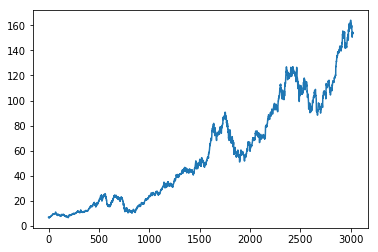

In [11]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
data = pd.read_csv('/Users/R/Downloads/AAPL.csv')[::1]
close_price = data.ix[:, 'Adj Close'].tolist()
plt.plot(close_price)
plt.show()
X = np.array(close_price)

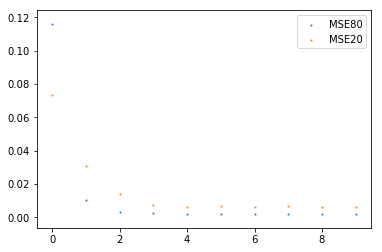

Last 10 GErr80
0.116009213847
0.0102999770137
0.0030775042106
0.00231501810833
0.00214272669913
0.00199368917746
0.00195861139463
0.00196412199959
0.00188339637096
Last 10 GErr20
0.0736967476295
0.0307053326973
0.0136637878982
0.00702081206564
0.00609597839532
0.00665971688022
0.00597556233818
0.00673181785942
0.00621400532903


In [16]:
import numpy as np
X = preprocessing(X[:])
x80, y80, x20, y20 = make_dataset(X,16)

structure = [16, 15,  1]
net = MLP(structure)
net.init_net()
times = 10
net.study(0.5, 0.5, times, x80, y80, x20, y20)

#for i in range(len(x20)):
    #print("X = ", x20[i])
    #net.set_X(x20[i])
    #net.count()
    #print("Y_pr = ", net.layer_Y[-1], "Y = ", y20[i])
    

    



In [13]:
import numpy as np
import random
import math
class MLP:
    def __init__(self, structure):
        self.structure = structure
        self.layer_XW = []
        self.layer_Y = []
        self.layer_d = []
        for i in range(len(structure)):
            self.layer_Y.append(np.zeros(structure[i]))
            self.layer_d.append(np.zeros(structure[i]))
            if i == 0:
                self.layer_XW.append(np.zeros((structure[i], 2, 1))) # ширина слоя, 0-х 1-w,  ширина нейрона
            else:
                self.layer_XW.append(np.zeros((structure[i], 2 , structure[i-1]+1)))
    def __str__(self):
        print("\n\nXW: ")
        for i in range(len(self.structure)):
            print(self.layer_XW[i])
            print()
        print("Y: ")
        for i in range(len(self.structure)):
            print(self.layer_Y[i])
            print()
        print("delta: ")
        for i in range(len(self.structure)):
            print(self.layer_d[i])
            print()
        return "END."
    def init_net(self):
        for i in range(len(structure)):
            for j in range(structure[i]):
                if i == 0:
                    self.layer_XW[i][j][1][0] = 1
                if i != 0:
                    for j_neuron in range(structure[i-1]+1):
                        self.layer_XW[i][j][1][j_neuron] = (0.1+0.3*random.random())*pow(-1,round(10*random.random()))
        for i in range(1, len(structure)):
            for j_neuron in range(structure[i]):
                self.layer_XW[i][j_neuron][0][-1] = 1
    def set_X(self, X):
        for j in range(structure[0]):
            self.layer_XW[0][j][0][0] = X[j]
    def f_act(self, X, W):
        y = sum(X*W)
        return 1.0/(1.0 + math.exp(-y))
    def foot_step(self, i, j):
        for j_x in range(structure[i-1]):
            self.layer_XW[i][j][0][j_x] = self.layer_Y[i-1][j_x]
    def count_neuron(self, i, j):
        self.layer_Y[i][j] = self.f_act(self.layer_XW[i][j][0], self.layer_XW[i][j][1])
    def count(self):
        for j_n in range(structure[0]):
            self.layer_Y[0][j_n] = self.layer_XW[0][j_n][0][0]
        for i in range(1,len(structure)):
            for j_n in range(structure[i]):
                self.foot_step(i, j_n)
                self.count_neuron(i, j_n)
    def study_ex(self, n_st, alfa, X, Y):
        net.count()
        #last layer
        for j_n in range(self.structure[-1]):
            self.layer_d[-1][j_n] = -2*alfa*(Y[j_n] - self.layer_Y[-1][j_n]) * self.layer_Y[-1][j_n] *(1 - self.layer_Y[-1][j_n])
            
        #other layers
        for i in range(len(self.structure)-2, 0, -1):
            for j_d in range(self.structure[i]):
                s = 0
                for j_next in range(self.structure[i+1]):
                    s=s+self.layer_XW[i+1][j_next][1][j_d]*self.layer_d[i+1][j_next]
                self.layer_d[i][j_d] = 2*alfa*s*self.layer_Y[i][j_d]*(1-self.layer_Y[i][j_d])
            
        for i in range(len(self.structure)-1, 0, -1):
            for j_n in range(self.structure[i]):
                delta = self.layer_d[i][j_n]
                for j_w in range((self.structure[i-1])+1):
                    self.layer_XW[i][j_n][1][j_w] -= n_st*delta*self.layer_XW[i][j_n][0][j_w]
                    
        
    def study(self, n_st, alfa, times_of_epoch, X80, Y80, X20, Y20):
        pat_ind = np.arange(len(X80))
        GErr80 = []
        GErr20 = []
        for ep in range(times_of_epoch):
            
            gErr20 = 0
            for p20 in range(len(X20)):
                net.set_X(X20[p20])
                net.count()
                gErr20 += sum((np.array(Y20[p20])-self.layer_Y[-1])**2)
            GErr20.append(gErr20/len(X20)) 
            
            gErr80 = 0
            for p80 in range(len(X80)):
                net.set_X(X80[p80])
                net.count()
                gErr80 += sum((np.array(Y80[p80])-self.layer_Y[-1])**2)
            GErr80.append(gErr80/len(X80)) 
            
            np.random.shuffle(pat_ind)
            for p in pat_ind:
                net.set_X(X80[p])
                net.study_ex(n_st, alfa, X80[p], Y80[p])
              
        self.draw(GErr80[round(len(GErr80)*0):], GErr20[round(len(GErr20)*0):])
        print("Last 10 GErr80")
        for i in range(-10,-1, 1):
            print(GErr80[i])
        print("Last 10 GErr20")
        for i in range(-10,-1, 1):
            print(GErr20[i])
        
                  
    def draw(self, gErr80, gErr20):
        import matplotlib.pyplot as plt
        x80 = np.arange(len(gErr80))
        x20 = np.arange(len(gErr20))
        scatter80 = plt.scatter(x80, gErr80, s = 1, label = "MSE80")
        scatter20 = plt.scatter(x20, gErr20, s = 1, label = "MSE20")
        plt.legend(loc='best', prop={'size': 10})
        plt.show()

def preprocessing(X):
    M = sum(X)/len(X)
    #X = X-M
    X = X - min(X)
    X = X/(max(abs(X)))
    return(X)

def make_dataset(X, learning_base):
    x = np.zeros((len(X)-learning_base, learning_base))
    y = np.empty((len(x),1))
    for j in range(len(x)):
        for i in range(learning_base):
            x[j][i] = X[j+i]
        y[j] = X[learning_base+j]
    pat_ind = np.arange(len(x))
    np.random.shuffle(pat_ind)
    #for j in range(len(x)):
        #x[j], x[pat_ind[j]] = x[pat_ind[j]], x[j]
        #y[j], y[pat_ind[j]] = y[pat_ind[j]], y[j] 
    return x[:round(len(x)*0.8)], y[:round(len(y)*0.8)], x[round(len(x)*0.8):], y[round(len(y)*0.8):]              

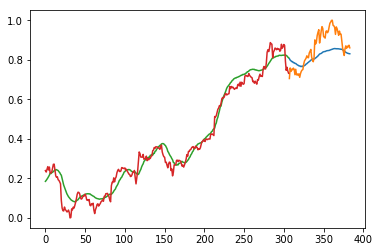

In [17]:
yp = []
yp80 = []
for i in range(len(x20)):
    net.set_X(x20[i])
    net.count()
    yp.append(net.layer_Y[-1][0])
    
for i in range(len(x80)):
    net.set_X(x80[i])
    net.count()
    yp80.append(net.layer_Y[-1][0])

plt.plot(np.arange(len(yp))+len(y80), yp)
plt.plot(np.arange(len(yp))+len(y80), y20)
plt.plot(np.arange(len(yp80)), yp80)
plt.plot(np.arange(len(yp80)), y80)
plt.show()